In [2]:
import sacpy as scp
import numpy as np
import matplotlib.pyplot as plt

In [4]:
sst = scp.load_sst()["sst"].loc[:, -20:30, 150:275]
ssta = scp.get_anom(sst)

In [5]:
eof = scp.EOF(np.array(ssta))
eof.solve()

In [6]:
pc = eof.get_pc(npt=2)
pt = eof.get_pt(npt=2)

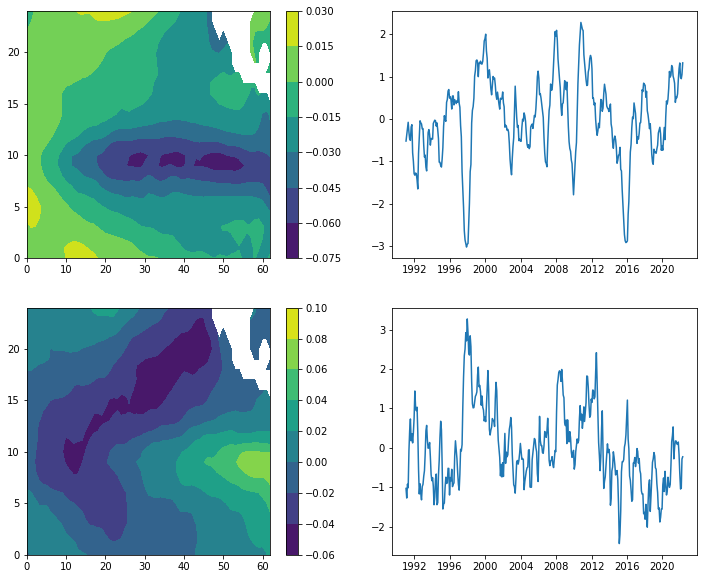

In [11]:
plt.figure(figsize=[12,10])
plt.subplot(221)
plt.contourf(pt[0,:,:])
plt.colorbar()
plt.subplot(222)
plt.plot(sst.time,pc[0])
plt.subplot(223)
plt.contourf(pt[1,:,:])
plt.colorbar()
plt.subplot(224)
plt.plot(sst.time,pc[1])
plt.savefig("../pic/eof_ana.png",dpi=300)